# Regression Python [Herly]

## Read Data

In [9]:
import pandas as pd

df = pd.read_csv('boston.csv')
df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
361,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666,20.2,350.65,14.19,19.9
49,0.21977,0.0,6.91,0,0.448,5.602,62.0,6.0877,3,233,17.9,396.90,16.20,19.4
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27,19.8
107,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384,20.9,387.69,14.09,20.4
394,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,19.1
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29,28.0
383,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666,20.2,396.90,24.56,12.3
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,21.0
215,0.19802,0.0,10.59,0,0.489,6.182,42.4,3.9454,4,277,18.6,393.63,9.47,25.0


## Preprocessing Data

### Handling Duplicated

In [8]:
df.duplicated().sum()

0

Dataset ini tidak memiliki Duplicated Row

### Handling Missing Value

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Berdasarkan informasi di atas, semua kolom tidak memiliki missing value.

### Handling Outlier

In [13]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


=== Visualisasi Sebelum Penanganan Outlier (Data Train) ===


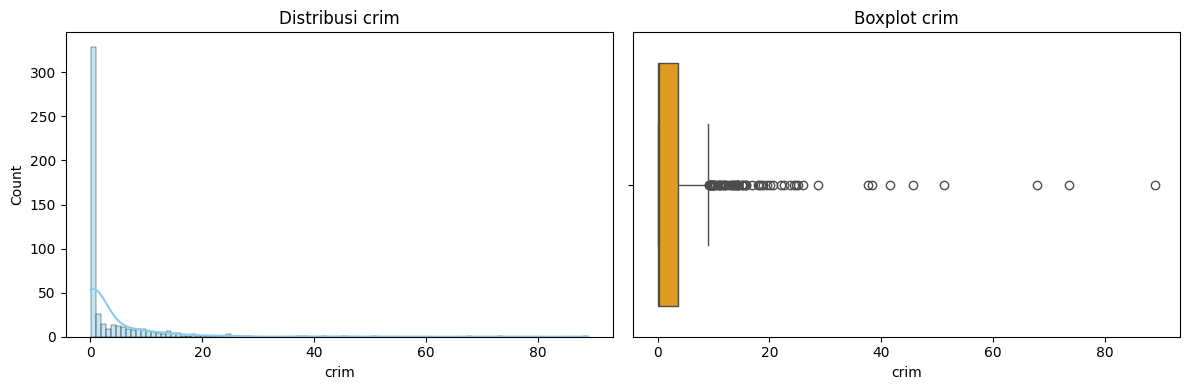

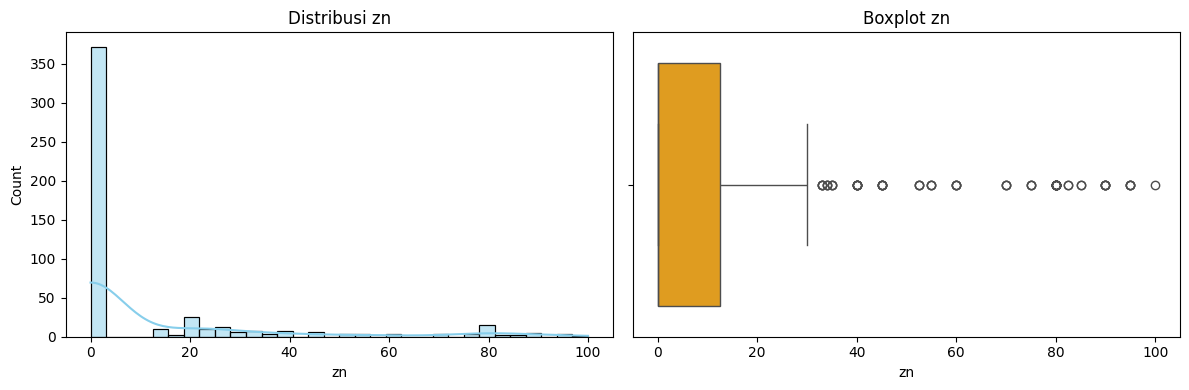

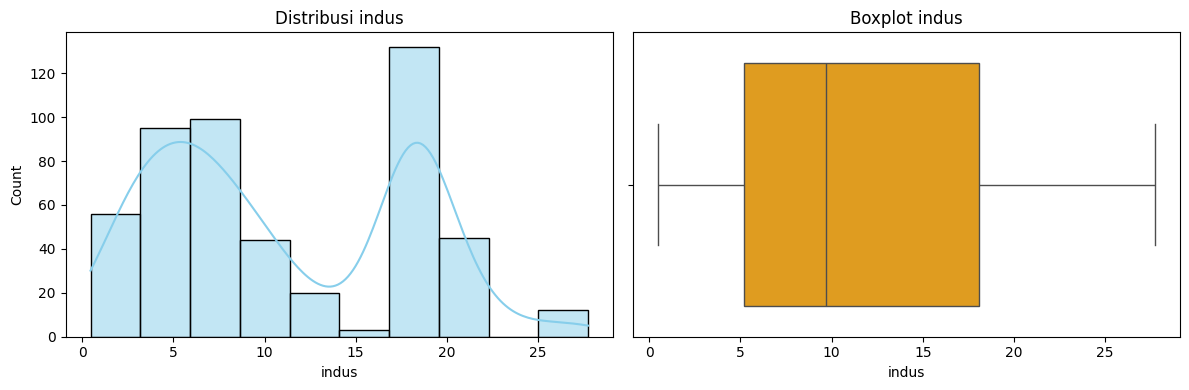

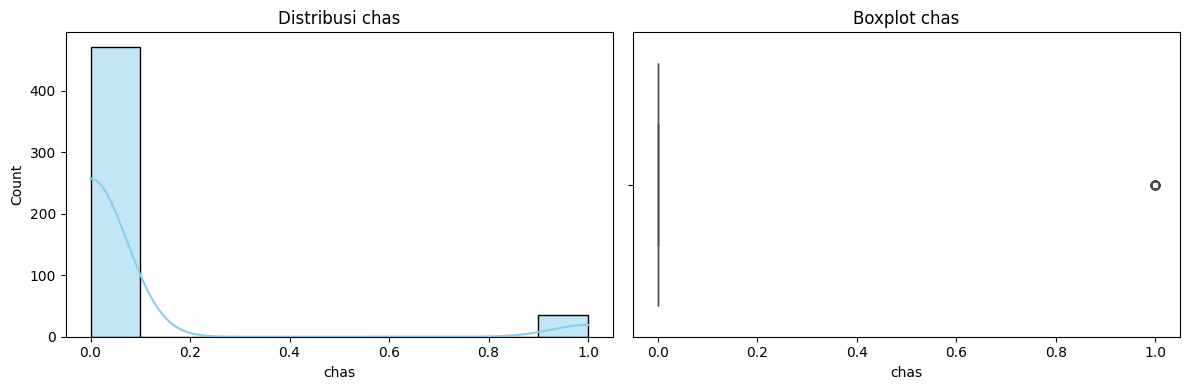

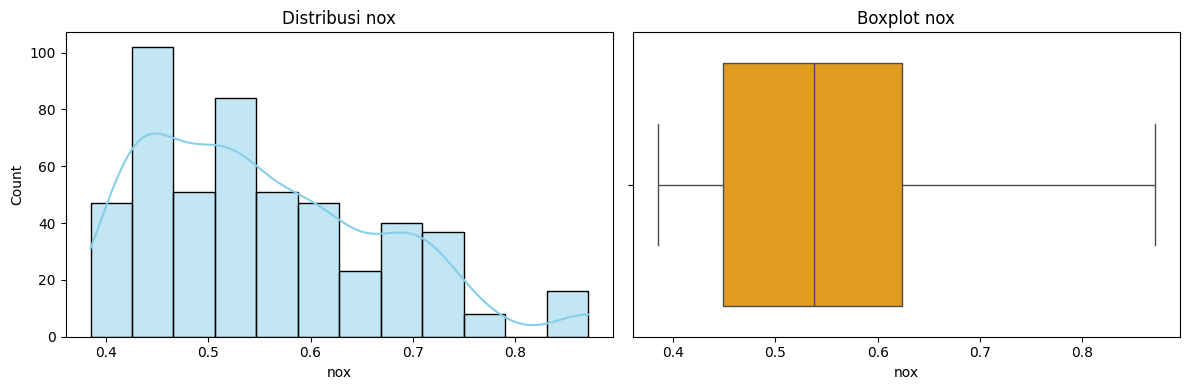

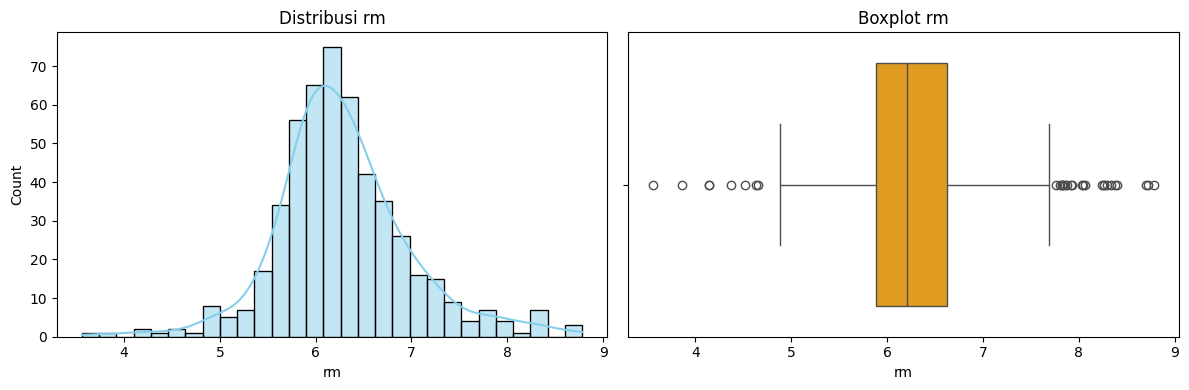

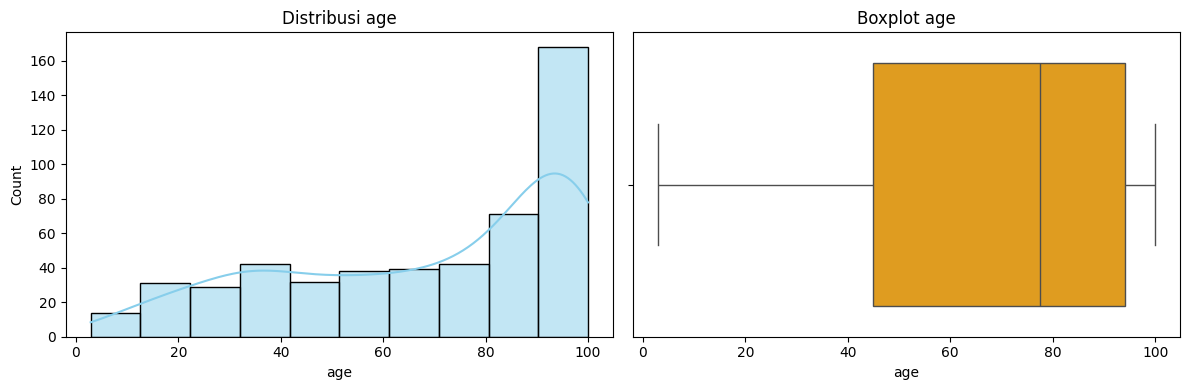

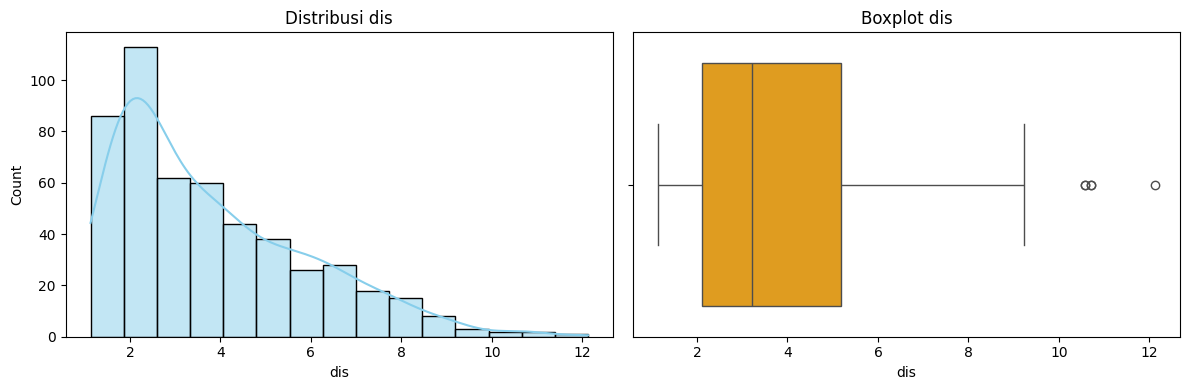

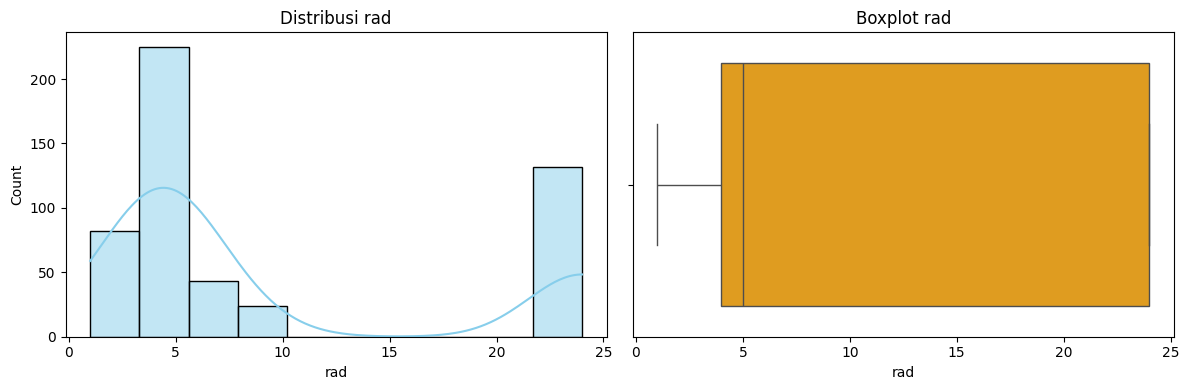

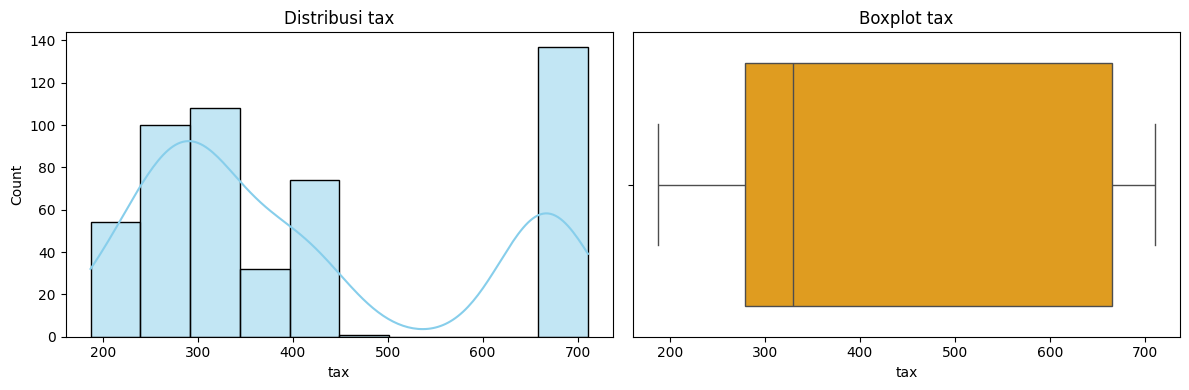

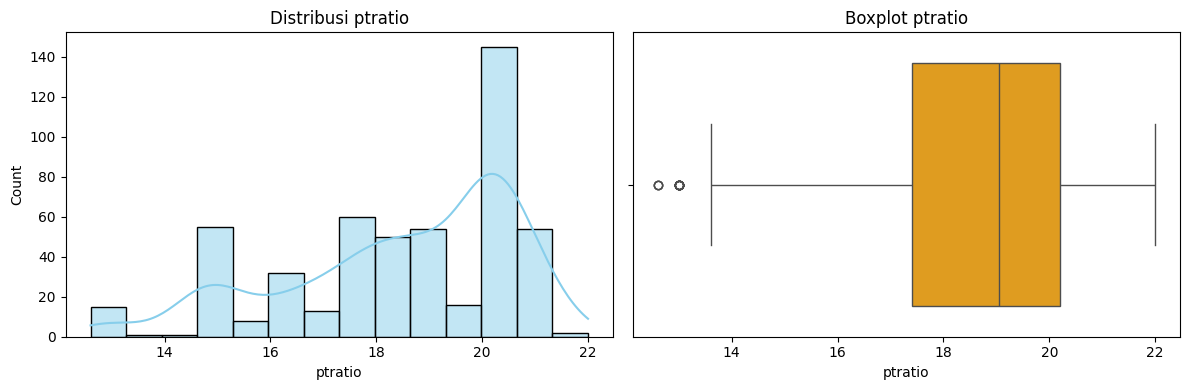

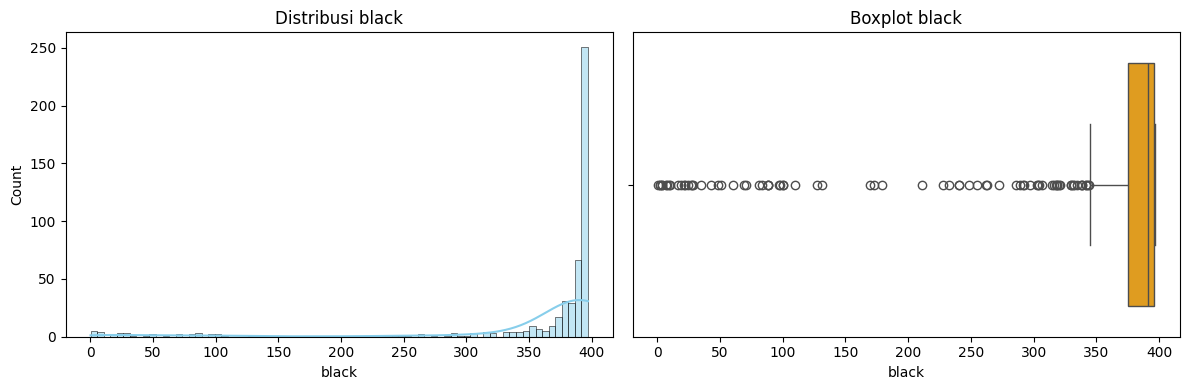

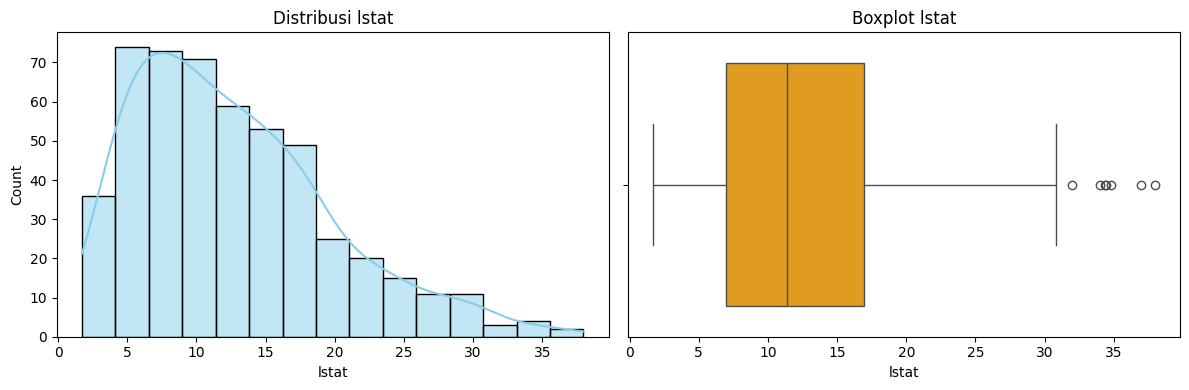

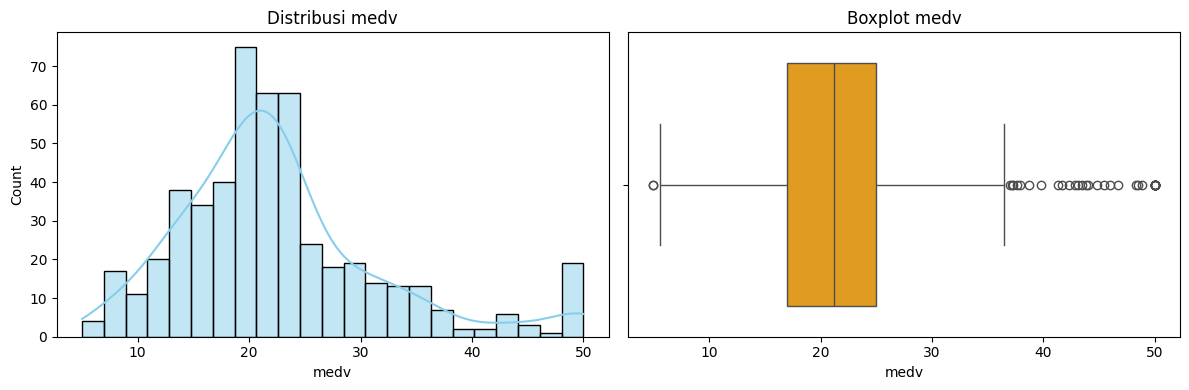

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_kolom = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']

# Visualisasi grafik
def plot_distribution_outlier(data, kolom):

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  # Plot distribusi
  sns.histplot(data[kolom], kde=True, ax=axes[0], color="skyblue")
  axes[0].set_title(f'Distribusi {kolom}')

  # Boxplot untuk outlier
  sns.boxplot(x=data[kolom], ax=axes[1], color="orange")
  axes[1].set_title(f'Boxplot {kolom}')

  plt.tight_layout()
  plt.show()

print("\n=== Visualisasi Sebelum Penanganan Outlier (Data Train) ===")
for kolom in kolom_kolom:
    plot_distribution_outlier(df, kolom)


Berdasarkan visulisasi Histogram dan Boxplot di atas, dapat dilihat bahwa adanya indikasi outlier pada data ini, tetapi dalam melakukan handling outlier tidak bisa sembarangan, terutama dalam pembuatan model, mengingat bahwasanya proses handling outlier ini bisa saja berdampak positif atau bahkan negatif untuk model yang akan dibuat, untuk itu akan dibuat dataframe baru yang merupakan hasil handling outlier. Metode Handling Outlier yang digunakan adalah IQR dan Z-score.

#### Dataframe Baru (df_noOutlier)

In [17]:
# Membuaat salinan DataFrame df, agar tidak mengganggu data asal (df)
df_noOutlier = df.copy()

#### Z-Score Method

In [18]:
from scipy import stats

kolom_analisis = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']

# menghitung Z-Score untuk setiap kolom
for kolom in kolom_analisis:
     df_noOutlier[f'Z_Score_{kolom}'] = stats.zscore(df_noOutlier[kolom])

In [20]:
df_noOutlier.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'Z_Score_crim', 'Z_Score_zn',
       'Z_Score_indus', 'Z_Score_chas', 'Z_Score_nox', 'Z_Score_rm',
       'Z_Score_age', 'Z_Score_dis', 'Z_Score_rad', 'Z_Score_tax',
       'Z_Score_ptratio', 'Z_Score_black', 'Z_Score_lstat', 'Z_Score_medv'],
      dtype='object')

In [21]:
# menghitung jumlah data yang bernilai di bawah -3 atau di atas 3
kolom_zscore = ['Z_Score_crim', 'Z_Score_zn',
       'Z_Score_indus', 'Z_Score_chas', 'Z_Score_nox', 'Z_Score_rm',
       'Z_Score_age', 'Z_Score_dis', 'Z_Score_rad', 'Z_Score_tax',
       'Z_Score_ptratio', 'Z_Score_black', 'Z_Score_lstat', 'Z_Score_medv']
for kolom in kolom_zscore:
    jumlah_outlier = ((df_noOutlier[kolom] < -3) | (df_noOutlier[kolom] > 3)).sum()
    print(f"Jumlah outlier pada {kolom}: {jumlah_outlier}")


Jumlah outlier pada Z_Score_crim: 8
Jumlah outlier pada Z_Score_zn: 14
Jumlah outlier pada Z_Score_indus: 0
Jumlah outlier pada Z_Score_chas: 35
Jumlah outlier pada Z_Score_nox: 0
Jumlah outlier pada Z_Score_rm: 8
Jumlah outlier pada Z_Score_age: 0
Jumlah outlier pada Z_Score_dis: 5
Jumlah outlier pada Z_Score_rad: 0
Jumlah outlier pada Z_Score_tax: 0
Jumlah outlier pada Z_Score_ptratio: 0
Jumlah outlier pada Z_Score_black: 25
Jumlah outlier pada Z_Score_lstat: 5
Jumlah outlier pada Z_Score_medv: 0


Output tersebut menunjukkan jumlah outlier pada setiap fitur dataset menggunakan metode Z-Score. Fitur-fitur dengan jumlah outlier yang signifikan adalah

1. Z_Score_chas (35), 
2. Z_Score_black (25), dan 
3. Z_Score_zn (14) 

Data di atas menunjukkan bahwa nilai-nilai pada fitur-fitur tersebut memiliki distribusi yang tidak normal dan mungkin mempengaruhi kinerja model. Sebaliknya, fitur-fitur seperti Z_Score_indus, Z_Score_nox, Z_Score_age, Z_Score_rad, Z_Score_tax, dan Z_Score_ptratio tidak memiliki outlier, menunjukkan bahwa nilai-nilai pada fitur-fitur tersebut relatif stabil dan tidak memiliki nilai ekstrem. Hasil ini dapat digunakan untuk mempertimbangkan strategi penanganan outlier, seperti transformasi data atau penghapusan outlier, untuk meningkatkan kualitas data dan kinerja model.


#### IQR Method

In [22]:
kolom_cek = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv',]

for kolom in kolom_cek:
    IQR = df_noOutlier[kolom].quantile(0.75) - df_noOutlier[kolom].quantile(0.25)
    lower_boundary = df_noOutlier[kolom].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df_noOutlier[kolom].quantile(0.75) + (IQR * 1.5)

    print(f"Kolom: {kolom}")
    print(f"Lower Boundary: {lower_boundary}")
    print(f"Upper Boundary: {upper_boundary}")
    print()

Kolom: crim
Lower Boundary: -5.31051125
Upper Boundary: 9.06963875

Kolom: zn
Lower Boundary: -18.75
Upper Boundary: 31.25

Kolom: indus
Lower Boundary: -14.175
Upper Boundary: 37.465

Kolom: chas
Lower Boundary: 0.0
Upper Boundary: 0.0

Kolom: nox
Lower Boundary: 0.18650000000000005
Upper Boundary: 0.8865

Kolom: rm
Lower Boundary: 4.778499999999999
Upper Boundary: 7.730500000000001

Kolom: age
Lower Boundary: -28.54999999999999
Upper Boundary: 167.64999999999998

Kolom: dis
Lower Boundary: -2.5322000000000005
Upper Boundary: 9.820800000000002

Kolom: rad
Lower Boundary: -26.0
Upper Boundary: 54.0

Kolom: tax
Lower Boundary: -301.5
Upper Boundary: 1246.5

Kolom: ptratio
Lower Boundary: 13.199999999999998
Upper Boundary: 24.4

Kolom: black
Lower Boundary: 344.10624999999993
Upper Boundary: 427.49625000000003

Kolom: lstat
Lower Boundary: -8.057500000000005
Upper Boundary: 31.962500000000006

Kolom: medv
Lower Boundary: 5.0624999999999964
Upper Boundary: 36.962500000000006



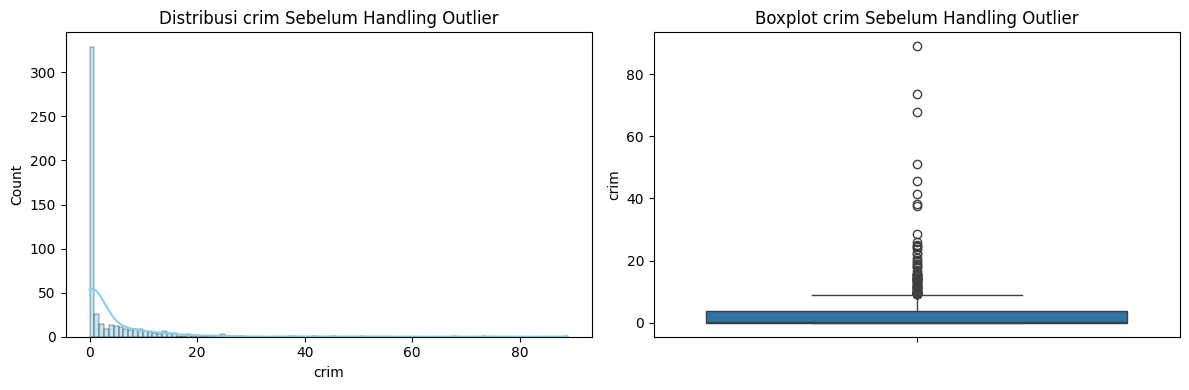

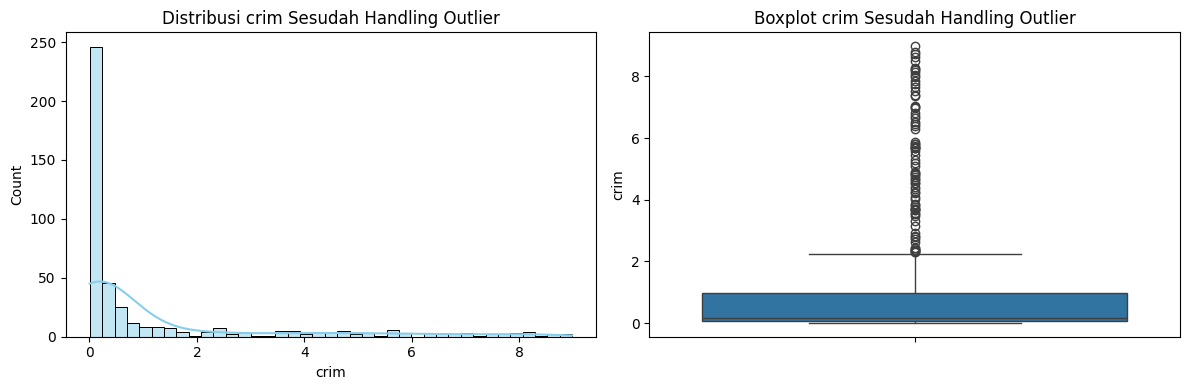

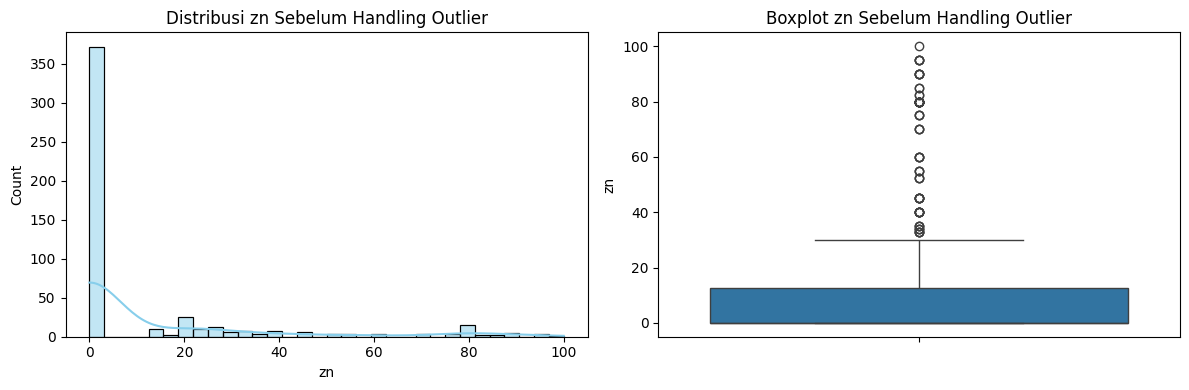

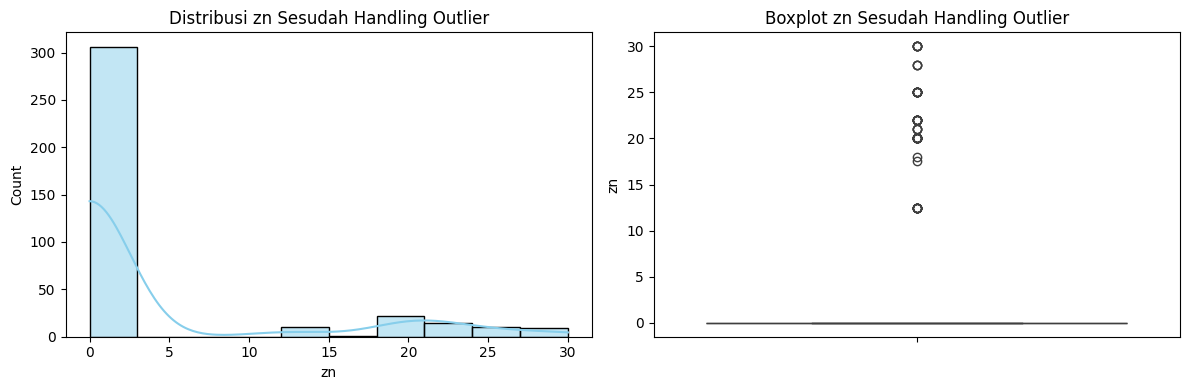

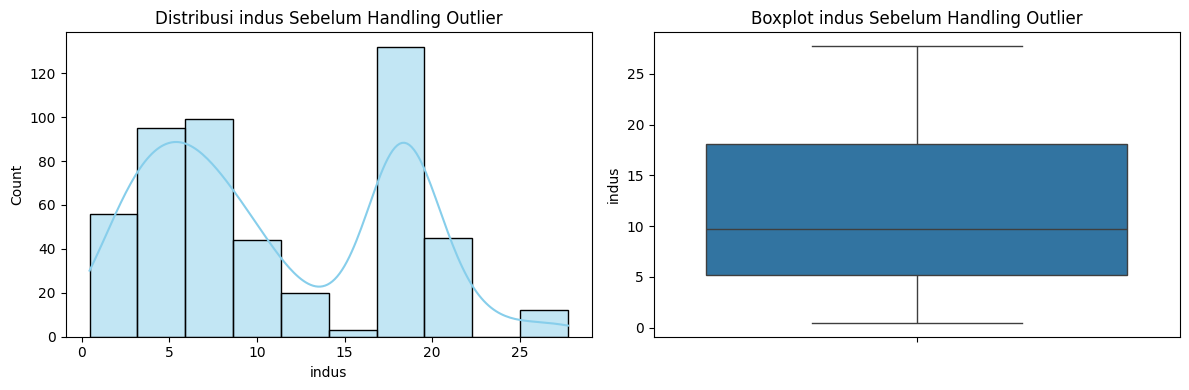

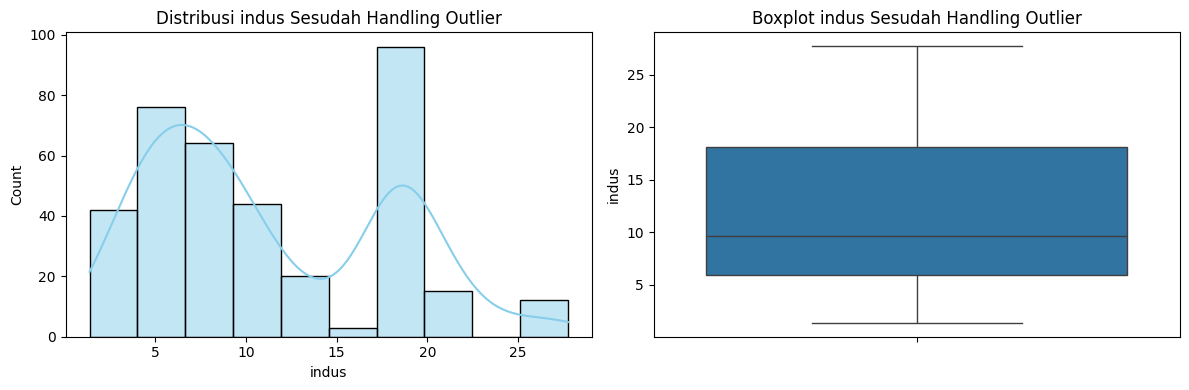

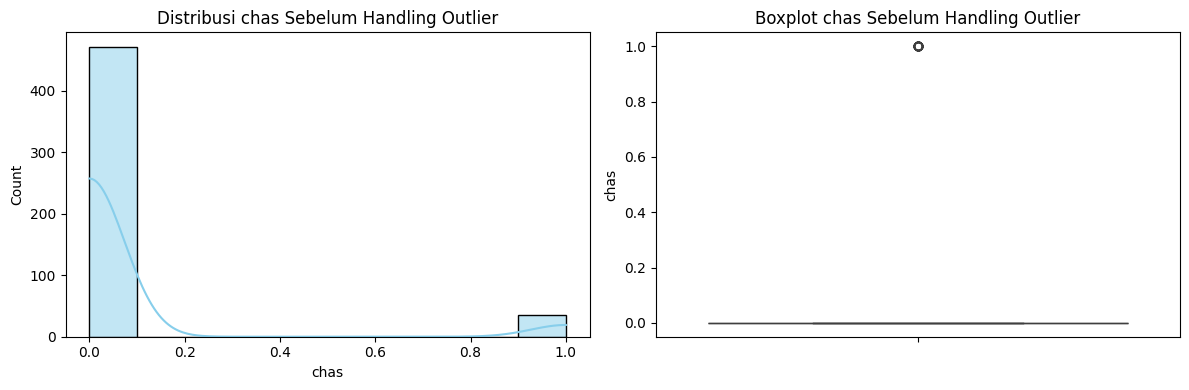

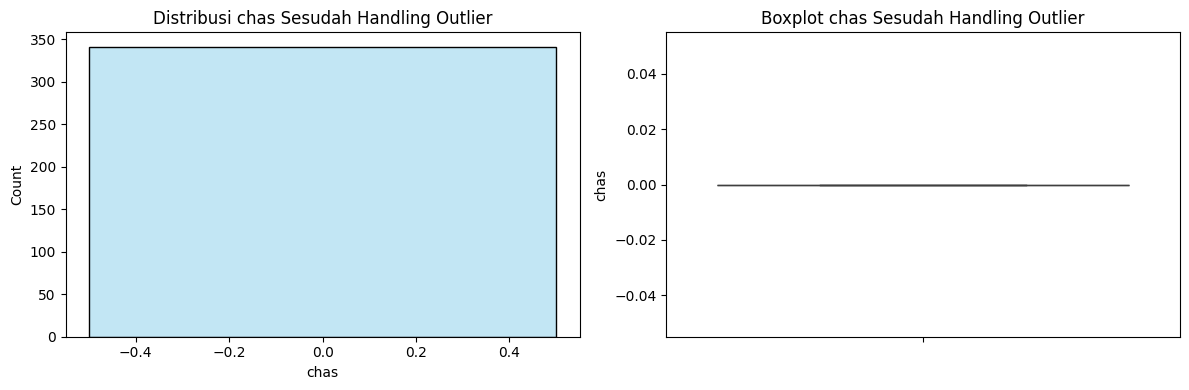

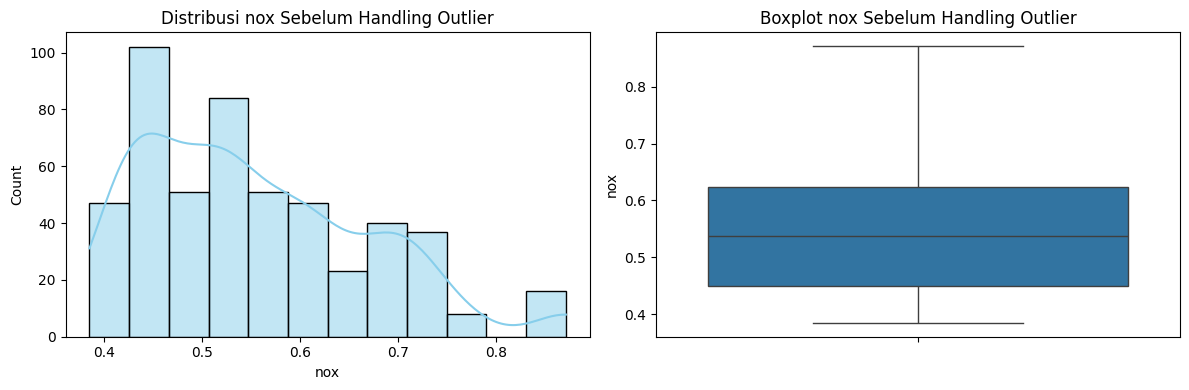

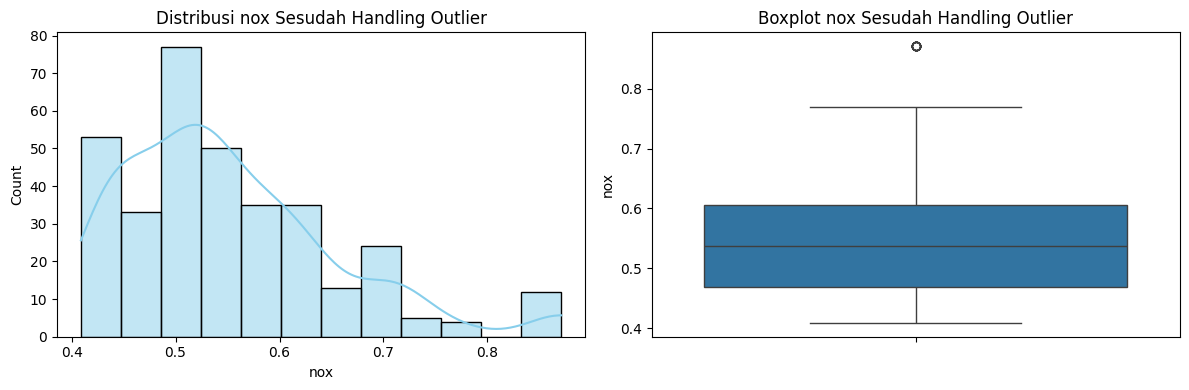

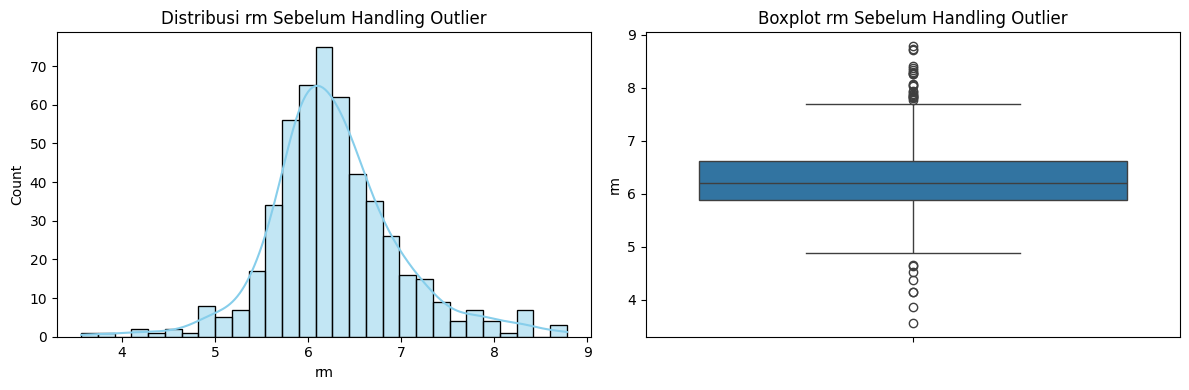

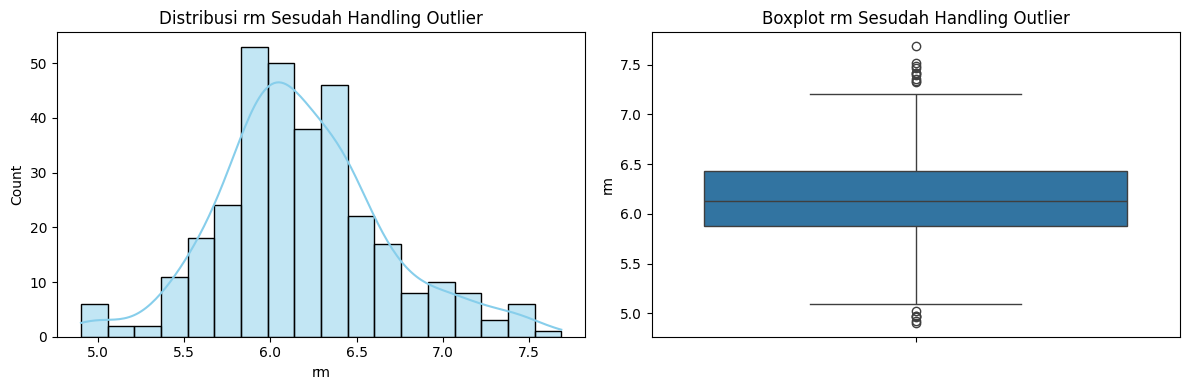

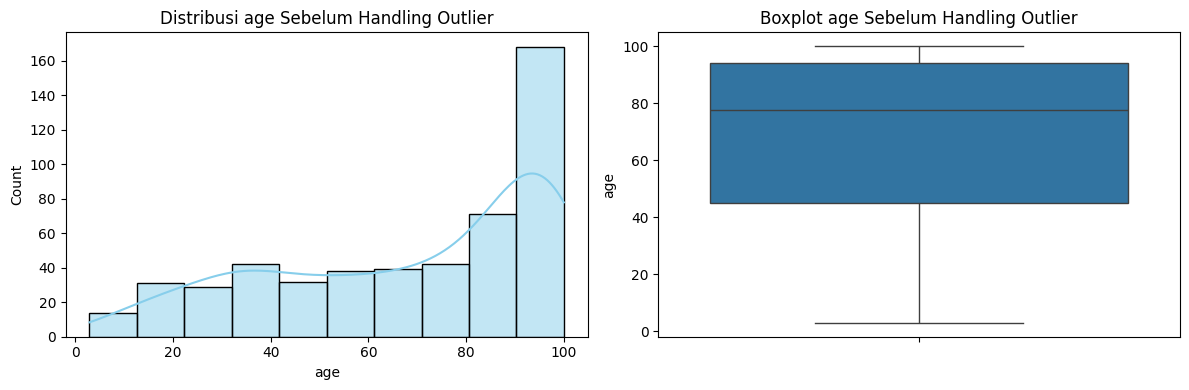

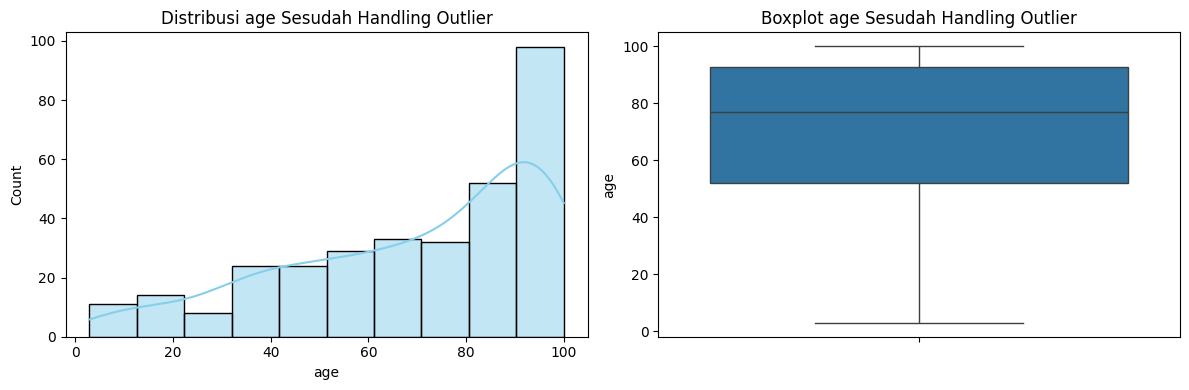

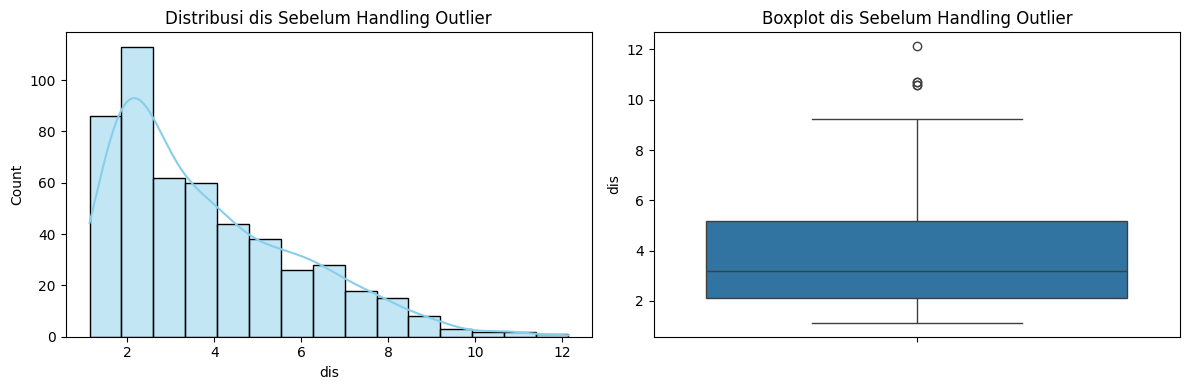

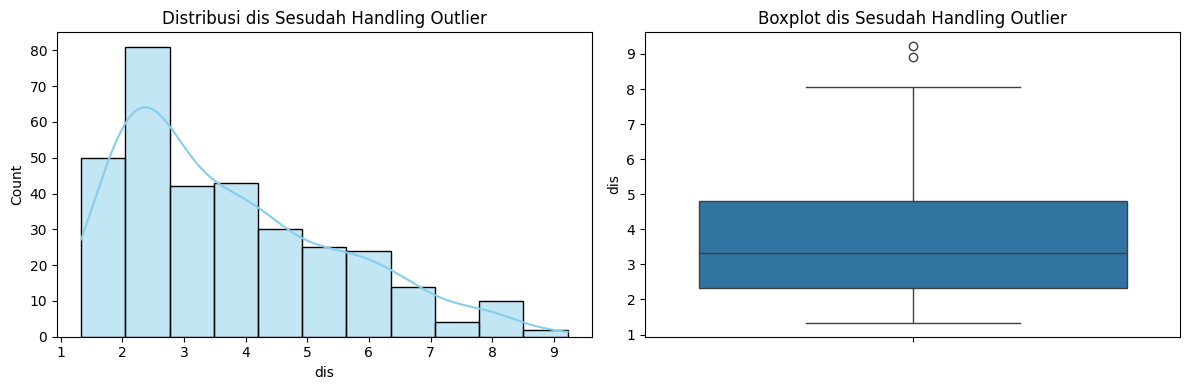

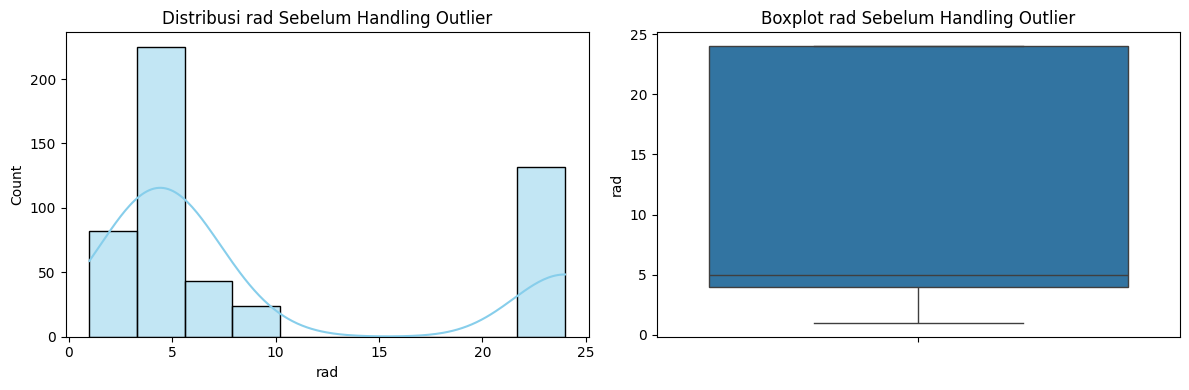

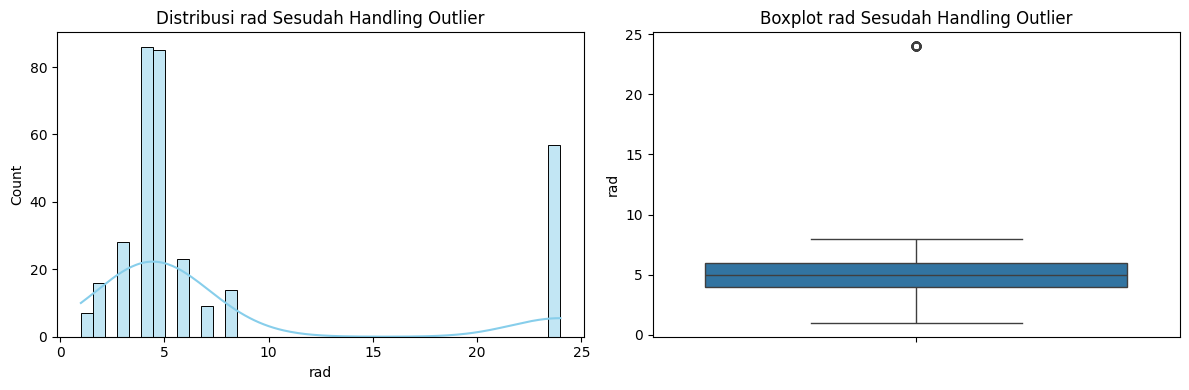

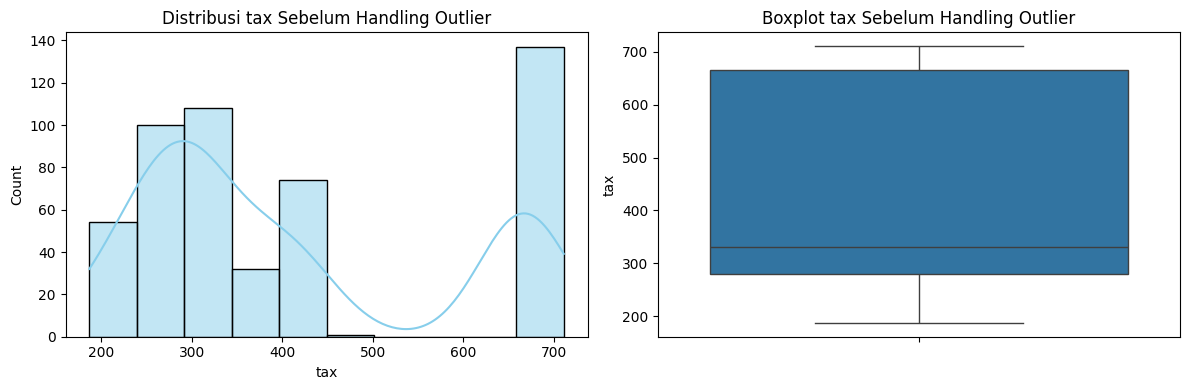

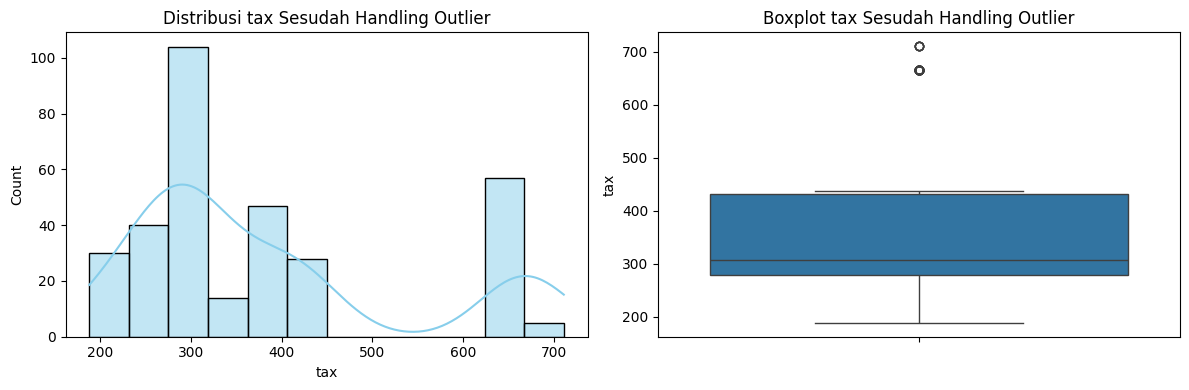

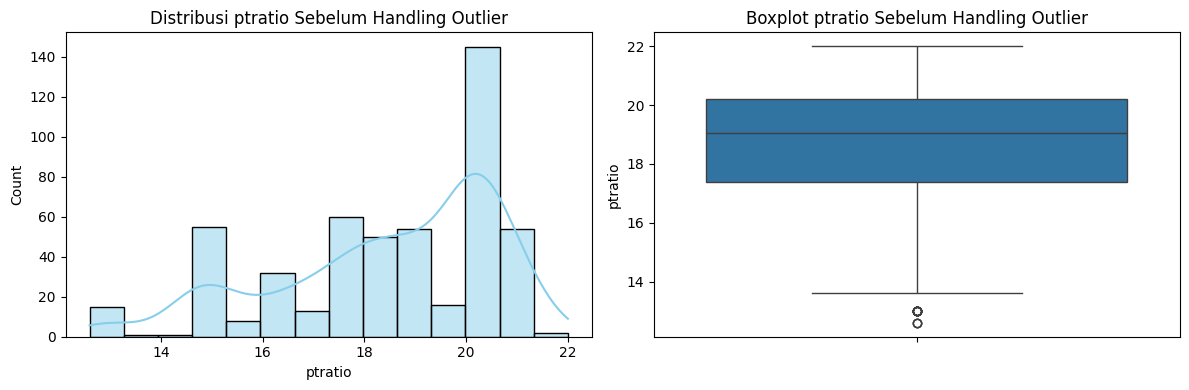

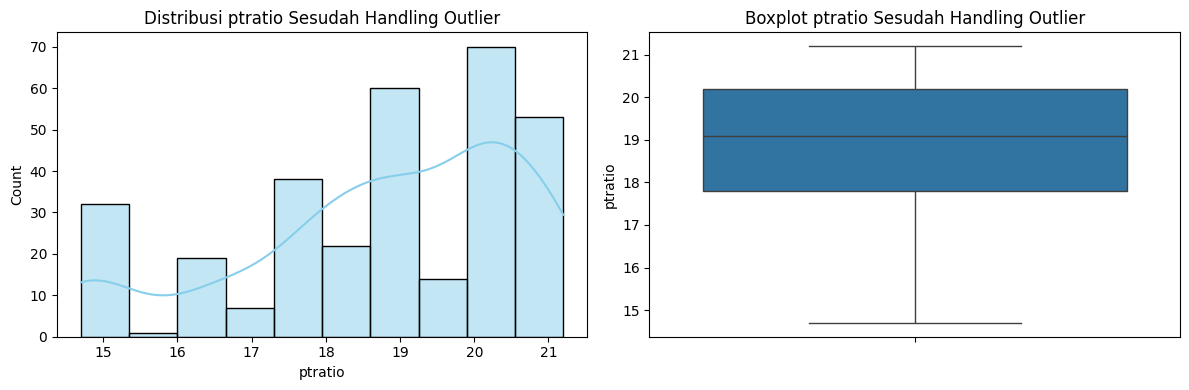

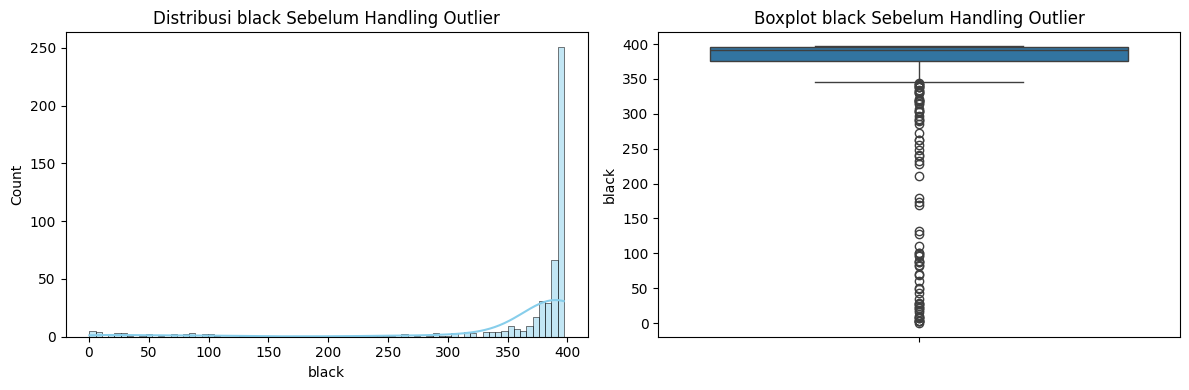

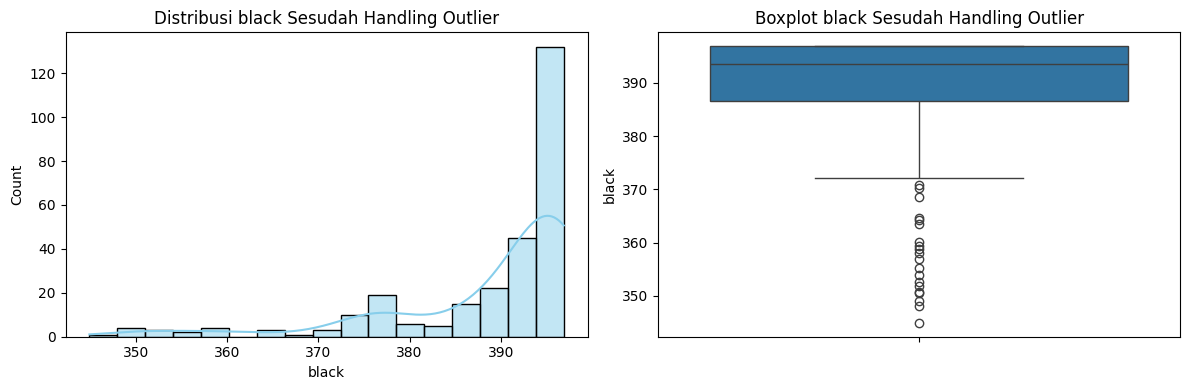

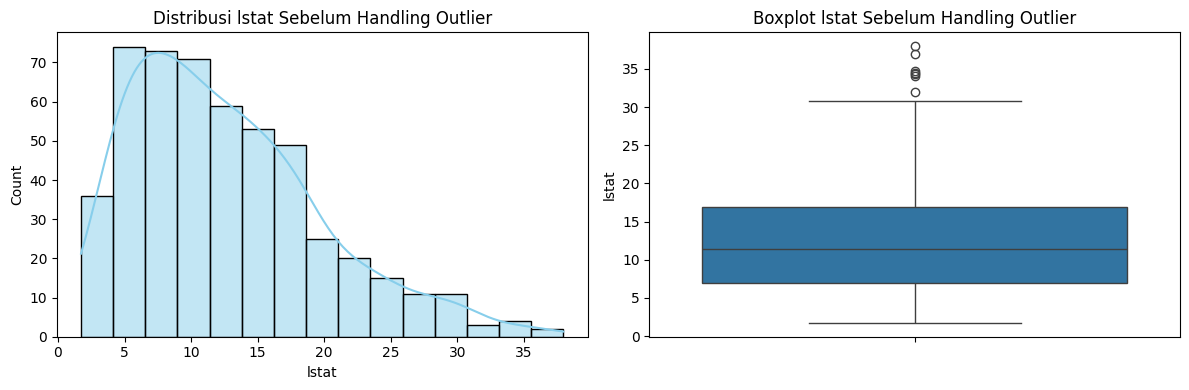

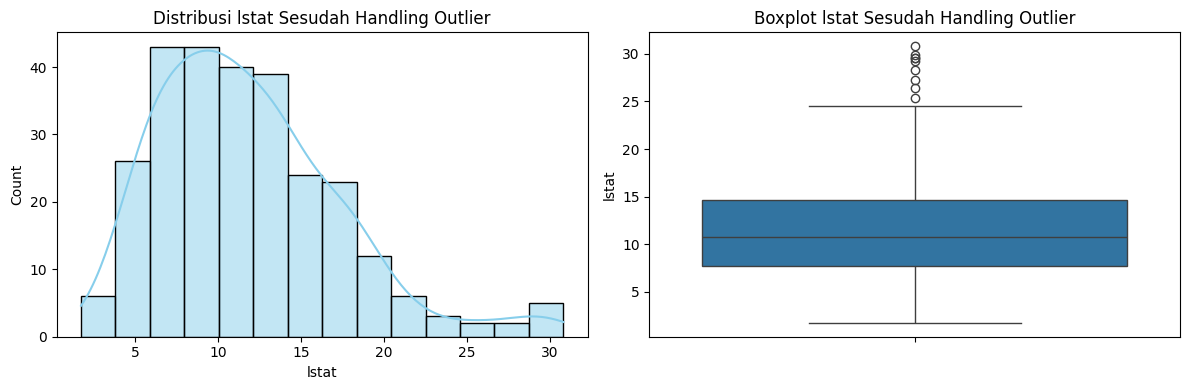

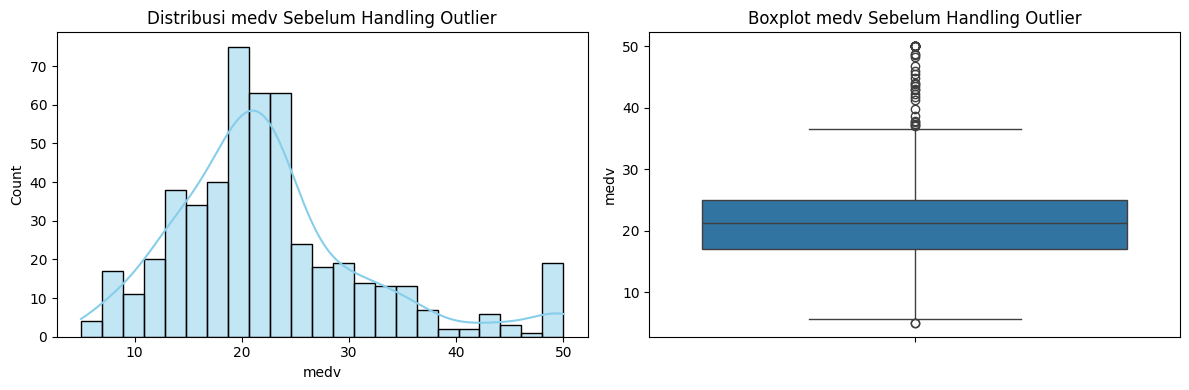

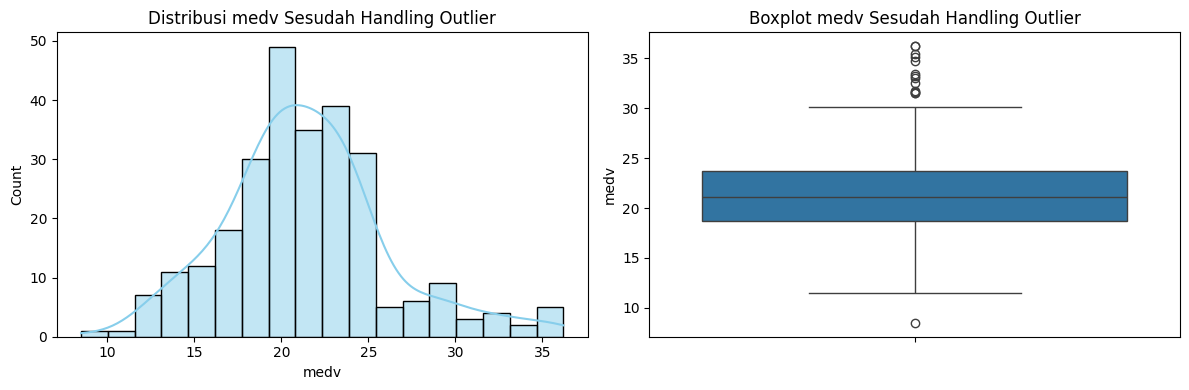

In [24]:
# Kolom yang akan dicek
kolom_cek = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

# Buat salinan df_noOutlier
df_noOutlier_afterHandling = df_noOutlier.copy()

# Iterasi
for kolom in kolom_cek:
    # Handling Outlier dengan IQR
    IQR = df_noOutlier[kolom].quantile(0.75) - df_noOutlier[kolom].quantile(0.25)
    lower_boundary = df_noOutlier[kolom].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df_noOutlier[kolom].quantile(0.75) + (IQR * 1.5)

    # Data setelah Handling Outlier
    df_noOutlier_afterHandling = df_noOutlier_afterHandling[(df_noOutlier_afterHandling[kolom] <= upper_boundary) & (df_noOutlier_afterHandling[kolom] >= lower_boundary)]

    # Visualisasi data sebelum Handling
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_noOutlier[kolom], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribusi {kolom} Sebelum Handling Outlier')
    sns.boxplot(data=df_noOutlier, y=kolom, ax=axes[1])
    axes[1].set_title(f"Boxplot {kolom} Sebelum Handling Outlier")
    plt.tight_layout()
    plt.show()

    # Visualisasi Data setelah Handling
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_noOutlier_afterHandling[kolom], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribusi {kolom} Sesudah Handling Outlier')
    sns.boxplot(data=df_noOutlier_afterHandling, y=kolom, ax=axes[1])
    axes[1].set_title(f"Boxplot {kolom} Sesudah Handling Outlier")
    plt.tight_layout()
    plt.show()

Berdasarkan proses Handling Outlier menggunakan metode IQR di atas, dapat dilihat bahwasanya nilai Outlier sudah berkurang tetapi ini sangat berpengaruh pada model yang akan di-Developed, Sehingga ini tidak efektif untuk dilakukan Handling Outlier. Untuk itu data yang digunakan adalah tetap data awal yakni df.